In [1]:
# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pyphotonicsims.components.elements import *
from pyphotonicsims.box_integration import get_box_path
import h5py

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

## Directional coupler
 - Coupling power
 $$\kappa = \sin{\frac{\pi \delta n L_c}{\lambda}}$$
 - Coupling rate for resonator
 $$\gamma_{ex} = \frac{c\log{1/(1-\kappa^2)}}{n_g L}$$

(0.0, 10.0)

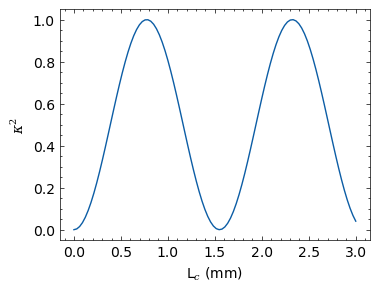

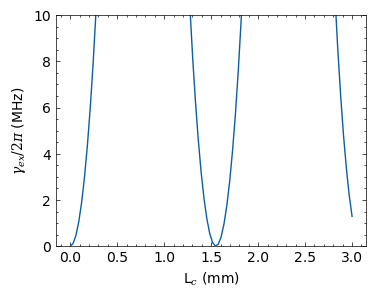

In [2]:
dn = 0.001
L = 1.0
ng = 1.53
wl = 1550e-9
Lc = np.linspace(0, 3e-3, 100)
ka2 = directional_coupler(dn, Lc, wl)
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(Lc*1e3, ka2)
plt.xlabel(r'L$_c$ (mm)')
plt.ylabel(r'$\kappa^2$')

plt.figure()
plt.plot(Lc*1e3, r_ex)
plt.xlabel(r'L$_c$ (mm)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.ylim((0, 10))

### 1550 nm 6 $\mu$m by 80 nm waveguide coupling $\delta n_{eff} $simulations

In [3]:
base_path = 'Simulations/lumerical mode/coupler/6um by 80nm waveguide'
filename = 'coupling_data_1550nm_6umby80nm_sweep_gap_0um_to_6um.mat'
filepath = get_box_path(base_path, filename)
f = h5py.File(filepath, 'r')
dneff = f['dneff'][:]
gapx = f['gap_list'][0]
dneff.shape

(8, 58)

### (1.1) Evaluate $\kappa^2$ by sweeping Lx at gap 2.5 $\mu$m
 - 2-point-coupled 4 meter coil resonator (COIL_V4) measures a maximum coupling of 6 MHz
 - Coupling power $$\kappa_m^2 = 4\kappa^2(1-\kappa^2)$$

(0.0, 20.0)

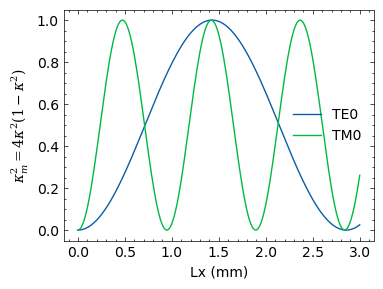

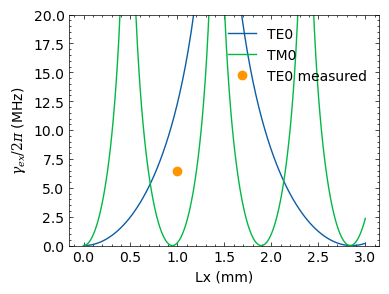

In [5]:
wl = 1550e-9
ng = 1.53
Lx = 0.1e-3
L = 4.0

WG_mode_dir = {'TE0': 0, 'TE1': 1, 'TM0': 2, 'TM1': 3}
mode_list = ['TE0', 'TM0']
mode_ind = [WG_mode_dir[mode] for mode in mode_list]

gap = 2.0e-6
ind_gap = np.argmin(np.abs(gapx - gap))
Lx_sweep = np.linspace(0, 3e-3, 200)

ka2 = np.array([directional_coupler(dneff[ii, ind_gap], Lx_sweep, wl) for ii in mode_ind])
kam = 4*ka2*(1-ka2)
r_ex = cavity_coupling_rate(kam, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(Lx_sweep*1e3, kam.T)
plt.xlabel(r'Lx (mm)')
plt.ylabel(r'$\kappa^2_m = 4\kappa^2(1-\kappa^2)$')
plt.legend(mode_list)

plt.figure()
plt.plot(Lx_sweep*1e3, r_ex.T)
plt.plot(1.0, 6.5, 'o')
plt.xlabel(r'Lx (mm)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.legend(mode_list + ['TE0 measured'])
plt.ylim((0, 20))